In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [8]:
data = pd.read_csv("relevant_sample_data.csv")
data

,Name,Gender,Age,City,Email,Salary,Department,Date_of_Joining
0,Maria Gonzales,Male,34.0,Johnstad,lewiskatrina@example.net,140022.0,Engineering,2021-12-25
1,NaN,Female,26.0,Port Matthew,wtrujillo@example.org,59257.0,Marketing,2021-06-01
2,Andrea Jackson,Male,NaN,Markhaven,jstrickland@example.org,117272.0,HR,2020-08-09
3,Ms. Jennifer Stevens PhD,Male,37.0,NaN,mejiacynthia@example.net,72207.0,Sales,2023-01-17
4,Alexandra Ramirez,Male,30.0,NaN,qstanton@example.net,NaN,NaN,2020-12-03
...,...,...,...,...,...,...,...,...
1095,Gwendolyn Brown,Female,34.0,NaN,NaN,112711.0,Marketing,2021-01-18
1096,Mark Frye,Male,23.0,Gentryshire,melissabarker@example.com,117468.0,Engineering,2022-08-02
1097,Dustin Giles,NaN,20.0,South Samuel,lauramorgan@example.com,104441.0,Engineering,2023-10-31
1098,Anna Mosley MD,Female,19.0,Larryville,karenortega@example.com,124397.0,HR,NaN


In [10]:
df = pd.DataFrame(data)
df

,Name,Gender,Age,City,Email,Salary,Department,Date_of_Joining
0,Maria Gonzales,Male,34.0,Johnstad,lewiskatrina@example.net,140022.0,Engineering,2021-12-25
1,NaN,Female,26.0,Port Matthew,wtrujillo@example.org,59257.0,Marketing,2021-06-01
2,Andrea Jackson,Male,NaN,Markhaven,jstrickland@example.org,117272.0,HR,2020-08-09
3,Ms. Jennifer Stevens PhD,Male,37.0,NaN,mejiacynthia@example.net,72207.0,Sales,2023-01-17
4,Alexandra Ramirez,Male,30.0,NaN,qstanton@example.net,NaN,NaN,2020-12-03
...,...,...,...,...,...,...,...,...
1095,Gwendolyn Brown,Female,34.0,NaN,NaN,112711.0,Marketing,2021-01-18
1096,Mark Frye,Male,23.0,Gentryshire,melissabarker@example.com,117468.0,Engineering,2022-08-02
1097,Dustin Giles,NaN,20.0,South Samuel,lauramorgan@example.com,104441.0,Engineering,2023-10-31
1098,Anna Mosley MD,Female,19.0,Larryville,karenortega@example.com,124397.0,HR,NaN


In [12]:
df.shape

(1100, 8)

In [15]:
df.isnull()

,Name,Gender,Age,City,Email,Salary,Department,Date_of_Joining
0,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...
1095,False,False,False,True,True,False,False,False
1096,False,False,False,False,False,False,False,False
1097,False,True,False,False,False,False,False,False
1098,False,False,False,False,False,False,False,True


# Sum of Total Null Value By Columns

In [16]:
df.isnull().sum()

Name               109
Gender             113
Age                111
City               113
Email              114
Salary             109
Department         115
Date_of_Joining    109
dtype: int64

# Percentage of Null Value 

In [19]:
(df.isnull().sum()/df.shape[0])*100

Name                9.909091
Gender             10.272727
Age                10.090909
City               10.272727
Email              10.363636
Salary              9.909091
Department         10.454545
Date_of_Joining     9.909091
dtype: float64

In [23]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100 # Tatal Null Value in Percentage

10.147727272727272

# Show Null Value Using Graph

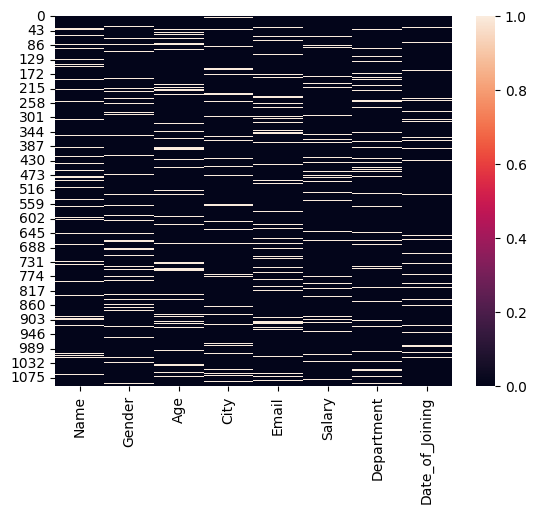

In [24]:
sns.heatmap(df.isnull())
plt.show()

# Handling Missing Value Using Scikit-Learn

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             991 non-null    object 
 1   Gender           987 non-null    object 
 2   Age              989 non-null    float64
 3   City             987 non-null    object 
 4   Email            986 non-null    object 
 5   Salary           991 non-null    float64
 6   Department       985 non-null    object 
 7   Date_of_Joining  991 non-null    object 
dtypes: float64(2), object(6)
memory usage: 68.9+ KB


In [27]:
# For Numerical Value Use "Mean"
si = SimpleImputer(strategy="mean")
f = df.select_dtypes(include="float64").columns
df[f] = si.fit_transform(df[f])
df.isnull().sum()

Name               109
Gender             113
Age                  0
City               113
Email              114
Salary               0
Department         115
Date_of_Joining    109
dtype: int64

In [28]:
# For String Value Use "most_frequent" (Mode)
si = SimpleImputer(strategy="most_frequent")
f = df.select_dtypes(include="object").columns
df[f] = si.fit_transform(df[f])
df.isnull().sum()

Name               0
Gender             0
Age                0
City               0
Email              0
Salary             0
Department         0
Date_of_Joining    0
dtype: int64